In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
url = 'S02-hw-dataset.csv'
data = pd.read_csv(url, sep=',') 

In [25]:
#начало датасета
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [26]:
#информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [27]:
#описание датасета
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [28]:
#доля пропусков
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [37]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [35]:
less_then_zero = data[(data['purchases'] < 0) | (data['age'] < 0) | (data['purchases'] < 0) | (data['revenue'] < 0)]
less_then_zero

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [33]:
suspicious = data[
    (data['purchases'] < 0) | 
    (data['age'] > 100) |
    (data['age'] < 10) |
    ((data['purchases'] > 0) & (data['revenue'] == 0)) |
    ((data['purchases'] == 0) & (data['revenue'] > 0))]
suspicious


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0
20,21,5.0,RU,8,1488


В данных присутствуют пропуски в поле возраста, а также один полный дубликат записи пользователя. Обнаружены логические аномалии: возраст 120 и 5 лет, отрицательное значение количества покупок и случаи, когда указано положительное число покупок при revenue = 0.

In [39]:
print("Частоты стран:")
data["country"].value_counts()

Частоты стран:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [40]:
print("Частоты покупок:")
pd.cut(data["purchases"], bins=[-5,0,3,7,12]).value_counts()


Частоты покупок:


purchases
(3, 7]     24
(0, 3]      9
(-5, 0]     4
(7, 12]     4
Name: count, dtype: int64

In [42]:
bins = [0, 18, 30, 45, 60, 200]
labels = ["0–18", "19–30", "31–45", "46–60", "60+"]
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

print("Частоты возрастных групп:")
data["age_group"].value_counts()

Частоты возрастных групп:


age_group
31–45    14
19–30    13
46–60     9
0–18      2
60+       1
Name: count, dtype: int64

In [43]:
print("Средние значения по странам:")
data.groupby("country")[["purchases", "revenue"]].mean()

Средние значения по странам:


,purchases,revenue
country,,
CN,4.500000,1054.000000
DE,6.500000,1445.500000
FR,4.250000,675.916667
RU,4.769231,790.076923
US,4.625000,557.375000


In [44]:
print("Суммарные значения по странам:")
data.groupby("country")[["purchases", "revenue"]].sum()

Суммарные значения по странам:


,purchases,revenue
country,,
CN,9,2108
DE,39,8673
FR,51,8111
RU,62,10271
US,37,4459


In [47]:
print("Средний revenue по возрастным группам:")
data.groupby("age_group",observed=True)["revenue"].mean()

Средний revenue по возрастным группам:


age_group
0–18     1296.000000
19–30     565.538462
31–45    1108.214286
46–60     605.777778
60+       785.000000
Name: revenue, dtype: float64

Наибольшее число пользователей приходит из стран RU, FR и US — они формируют основную массу выборки. В возрастном распределении доминируют группы 19–30 и 31–45, что типично для онлайн-пользователей, однако встречается и аномальная группа («60+» из-за ошибки: возраст 120).
По агрегатам видно, что страны заметно отличаются: например, у пользователей из DE и FR выше средний доход, а в RU — больше пользователей, но средний revenue несколько ниже. Возрастные группы также различаются: "46–60" показывает высокие средние траты, тогда как молодые пользователи (0–18 и 19–30) приносят меньше.

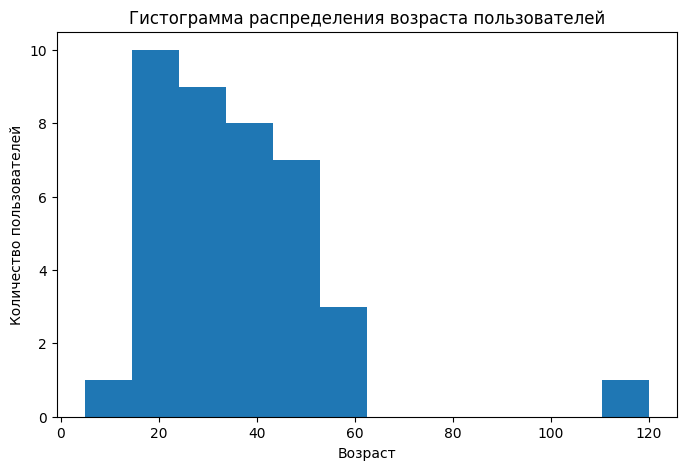

In [51]:
plt.figure(figsize=(8,5))
plt.hist(data["age"].dropna(), bins=12) 
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Гистограмма распределения возраста пользователей")

plt.savefig("figures/age_hist.png", dpi=150)
plt.show()

Гистограмма показывает основной возрастной кластер в диапазоне 20–50 лет, а также выбросы — возраст 5 и 120 лет

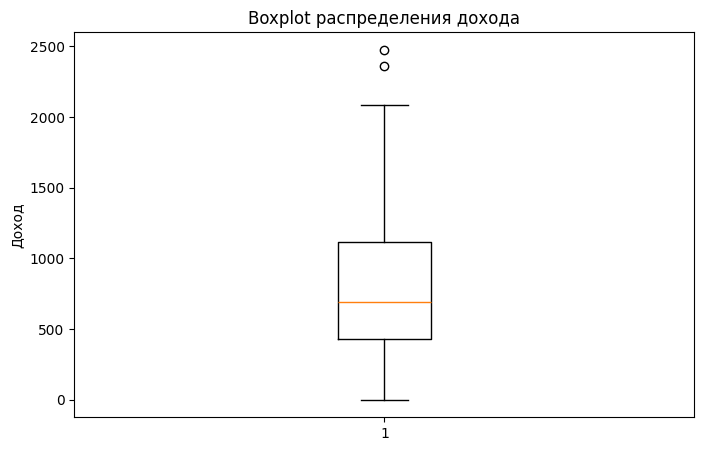

In [53]:
plt.figure(figsize=(8,5))
plt.boxplot(data["revenue"])
plt.ylabel("Доход")
plt.title("Boxplot распределения дохода")
plt.savefig("figures/boxplot.png", dpi=150)
plt.show()

Диаграмма показывает несколько высоких выбросов — особенно значения свыше 2000. Основная масса доходов лежит гораздо ниже.

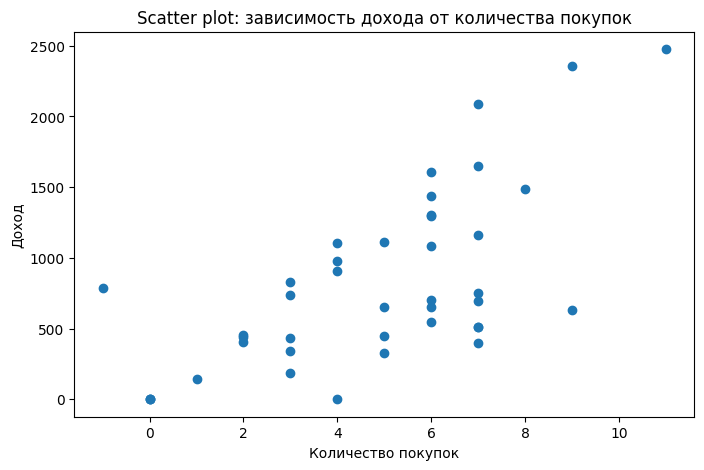

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(data["purchases"], data["revenue"])
plt.xlabel("Количество покупок")
plt.ylabel("Доход")
plt.title("Scatter plot: зависимость дохода от количества покупок")
plt.savefig("figures/scatter.png", dpi=150)
plt.show()

Видна естественная положительная зависимость: больше покупок → выше выручка. Но так же есть аномалии